### Importing libraries

In [79]:
import pandas as pd
import numpy as np

import seaborn as sns


%matplotlib inline

### Importing data

In [62]:
df = pd.read_excel('https://github.com/lalit-kumr/dsp_case_study/blob/main/Case%20Study%20-%20Regression-Classificaiton-Segmentation_2.xlsx?raw=true',
                   sheet_name='CustData')


df_new_cust = pd.read_excel('https://github.com/lalit-kumr/dsp_case_study/blob/main/Case%20Study%20-%20Regression-Classificaiton-Segmentation_2.xlsx?raw=true',
                            sheet_name='NewCust')

In [63]:
df.dtypes

ID                             int64
FICO                         float64
Business_Revenue             float64
TSR                          float64
Last_6M_Avg_Util             float64
Income                       float64
Last_6M_Avg_Remit            float64
Last_6M_Avg_Bal              float64
Internal_Revolve             float64
Lending_AR_pct_in_last_6M    float64
ExternalBalance              float64
Months_in_Business           float64
preferred_spend_line         float64
total_cards                   object
preferred_bal_line           float64
preavgremit1_3_all           float64
External_rev_rate            float64
Supplementary_Cards            int64
isChargeCust                   int64
CMV                          float64
Assigned_Line                 object
dtype: object

In [64]:
#as total_cards is numerical in nature but showing up as obj type, we have to change its content to numeric data type.

#checking count of values in total_cards

df['total_cards'].value_counts()

#here period(.) is coming as value. we have to replace cells that contain only period(.) with NaN.

1      20816
2       7965
3       2796
4        910
0        756
.        273
5        269
6        117
7         31
8         26
10        14
12         9
9          8
15         2
11         2
14         1
104        1
18         1
20         1
22         1
23         1
Name: total_cards, dtype: int64

In [65]:
#replacing (.) in total_cards with NaN
df['total_cards'] = df['total_cards'].replace('\.+',np.nan,regex=True)

#after replacing (.) with np.nan, pandas automatically changed the type of total_cards to float64.
df.total_cards.dtypes

dtype('float64')

### Finding missing values

In [66]:
#checking missing values
df.isna().sum()

ID                               0
FICO                           961
Business_Revenue              3385
TSR                          12494
Last_6M_Avg_Util                 1
Income                        3495
Last_6M_Avg_Remit              835
Last_6M_Avg_Bal                835
Internal_Revolve             15817
Lending_AR_pct_in_last_6M     4550
ExternalBalance               7565
Months_in_Business           10502
preferred_spend_line          8522
total_cards                    273
preferred_bal_line            8024
preavgremit1_3_all             866
External_rev_rate            22194
Supplementary_Cards              0
isChargeCust                     0
CMV                              0
Assigned_Line                    0
dtype: int64

In [67]:
#as some of the columns have more than 20% of na values. we will drop those columns
# col to be dropped             NA values
# ID                            0(dropping because it is of no use to us)
# TSR                          12494
# Internal_Revolve             15817
# ExternalBalance               7565
# Months_in_Business           10502
# preferred_spend_line          8522
# preferred_bal_line            8024
# External_rev_rate            22194

#we will drop ID column too becasue it is of no use to us



#selected columns
df = df[['FICO',
     'Business_Revenue',
     'Last_6M_Avg_Util',
     'Income',
     'Last_6M_Avg_Remit',
     'Last_6M_Avg_Bal',
     'Lending_AR_pct_in_last_6M',
     'total_cards',
     'preavgremit1_3_all',
     'Supplementary_Cards',
     'isChargeCust',
     'CMV',
     'Assigned_Line']]


In [68]:
#checking nan values in selected columns
df.isna().sum()

FICO                          961
Business_Revenue             3385
Last_6M_Avg_Util                1
Income                       3495
Last_6M_Avg_Remit             835
Last_6M_Avg_Bal               835
Lending_AR_pct_in_last_6M    4550
total_cards                   273
preavgremit1_3_all            866
Supplementary_Cards             0
isChargeCust                    0
CMV                             0
Assigned_Line                   0
dtype: int64

### Label endoding

In [69]:
cat_encoded = pd.get_dummies(df.Assigned_Line)
cat_encoded.drop(labels=['Low'],axis=1,inplace=True)
cat_encoded.columns = ['Assigned_Line']

#replacing assigned line in df
df.Assigned_Line = cat_encoded.Assigned_Line


### Missing value imputation

In [70]:
import numpy as np
from sklearn.impute import KNNImputer

#imputing missing values in df with the help of knn imputer
imputer = KNNImputer(n_neighbors=5)
df[:] = imputer.fit_transform(df)

In [71]:
#checking no of missing values again
df.isna().sum()

FICO                         0
Business_Revenue             0
Last_6M_Avg_Util             0
Income                       0
Last_6M_Avg_Remit            0
Last_6M_Avg_Bal              0
Lending_AR_pct_in_last_6M    0
total_cards                  0
preavgremit1_3_all           0
Supplementary_Cards          0
isChargeCust                 0
CMV                          0
Assigned_Line                0
dtype: int64

### Outlier removal

In [72]:
df.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Remit,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,total_cards,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,917.362187,1.098785,631.570803,15.117075,2.042418,199.983394,56.073184,1.534159,2.080577,0.400029,0.298059,161.355950,0.110206
std,49.757358,12.160276,30.863024,27.814902,8.854013,11.155086,6.567695,1.134479,7.950922,0.684850,0.457412,123.231136,0.313151
min,730.588235,0.001333,347.053355,0.005000,0.353228,0.000000,13.028620,0.000000,0.959315,0.000000,0.000000,0.000000,0.000000
25%,882.352941,0.083333,611.689854,6.763636,0.692842,197.199891,54.194295,1.000000,1.041529,0.000000,0.000000,104.385542,0.000000
50%,924.705882,0.166667,619.802034,10.701200,1.000153,197.912787,58.632548,1.000000,1.264375,0.000000,0.000000,117.493115,0.000000
75%,956.470588,0.555556,637.448377,18.181818,1.733122,199.684733,58.632548,2.000000,1.826007,1.000000,1.000000,159.446213,0.000000
max,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,1000.000000,104.000000,1000.000000,14.000000,1.000000,1000.000000,1.000000


In [73]:
#Now we will treat outliers in df
from scipy.stats import mstats

for x in df:
  df.loc[:,x] = mstats.winsorize(df[x], limits=[0.05, 0.05])
df.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Remit,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,total_cards,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,918.016291,0.535636,629.653090,12.649588,1.488918,199.104251,56.039356,1.482982,1.647411,0.329235,0.298059,152.249282,0.110206
std,46.808446,0.769238,23.554414,8.003603,1.209260,2.893046,4.043624,0.704107,0.924032,0.469942,0.457412,82.122704,0.313151
min,827.058824,0.027778,611.574748,3.181818,0.559710,196.911295,47.899686,1.000000,0.959315,0.000000,0.000000,89.263339,0.000000
25%,882.352941,0.083333,611.689854,6.763636,0.692842,197.199891,54.194295,1.000000,1.041529,0.000000,0.000000,104.385542,0.000000
50%,924.705882,0.166667,619.802034,10.701200,1.000153,197.912787,58.632548,1.000000,1.264375,0.000000,0.000000,117.493115,0.000000
75%,956.470588,0.555556,637.448377,18.181818,1.733122,199.684733,58.632548,2.000000,1.826007,1.000000,1.000000,159.446213,0.000000
max,988.235294,3.000000,695.652554,33.363636,5.160446,207.840874,58.632548,3.000000,4.459971,1.000000,1.000000,407.063683,1.000000


### EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd78d2eebd0>,
      dtype=object)

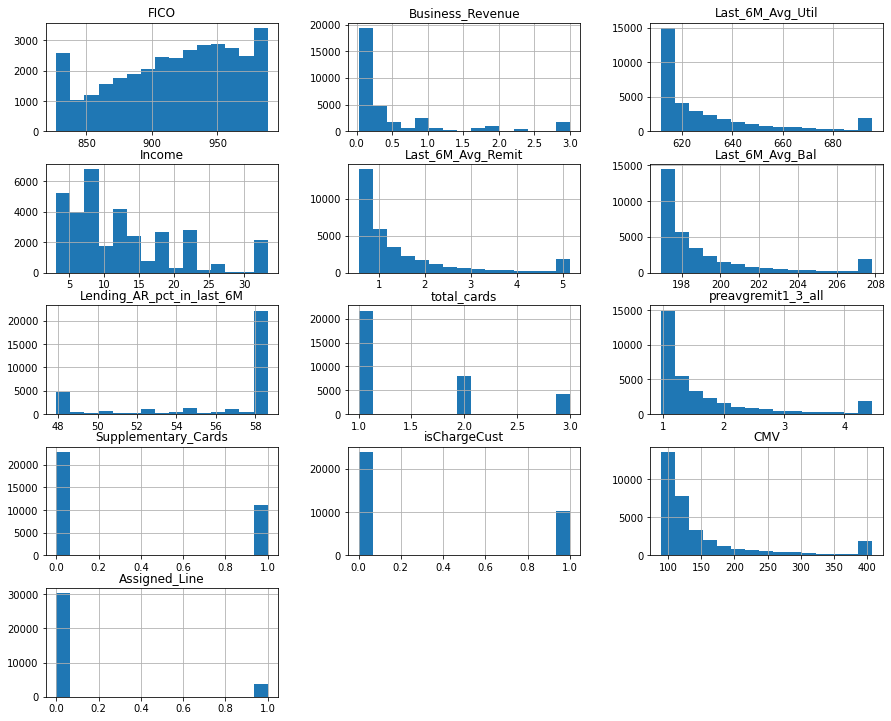

In [74]:
df.hist(bins=15, figsize=(15,15), layout=(6,3))

# Regression

#### Normalizing target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


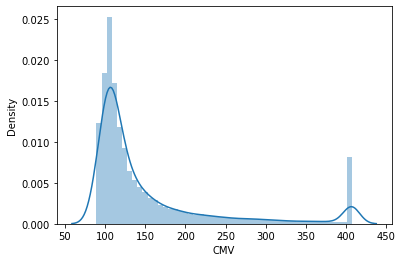

In [83]:
sns.distplot(df.CMV)

### Running OLS model on our dataset with all features

In [102]:
#seperating features and target variable
df_x = df[df.columns.difference(other=['CMV'])]
df_y = df['CMV']

In [103]:
### OLS regression
import statsmodels.api as sm

model = sm.OLS(df_y,df_x)

model_fit = model.fit()

print(model_fit.summary())



                                 OLS Regression Results                                
Dep. Variable:                    CMV   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                          1.194e+04
Date:                Sat, 11 Sep 2021   Prob (F-statistic):                        0.00
Time:                        12:24:41   Log-Likelihood:                     -1.9538e+05
No. Observations:               34000   AIC:                                  3.908e+05
Df Residuals:                   33988   BIC:                                  3.909e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [104]:
#As only assigned line has p value more than 0.05,
#we will continue with the next step of removing multicollinearity by using VIF

### VIF

In [105]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


X = df_x
vif_results = calc_vif(X)
vif_results.sort_values(by='VIF',ascending=False)

,variables,VIF
4,Last_6M_Avg_Bal,1844.845628
6,Last_6M_Avg_Util,1272.443813
2,FICO,408.426352
7,Lending_AR_pct_in_last_6M,288.922388
10,preavgremit1_3_all,56.876401
5,Last_6M_Avg_Remit,34.296849
11,total_cards,6.554057
3,Income,4.118261
9,isChargeCust,2.182775
1,Business_Revenue,1.637653


In [106]:
#2 of our variables have VIF values in 4 digits and 2 variables have vif values in 3 digits.
#Last_6M_Avg_Bal...............1844.845628
#Last_6M_Avg_Util..............1272.443813
#FICO...........................408.426352
#Lending_AR_pct_in_last_6M......288.922388


#removing 'Last_6M_Avg_Bal' feature from df_x
df_x.drop(labels=['Last_6M_Avg_Bal'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
#running vif again
vif_results = calc_vif(X)
vif_results.sort_values(by='VIF',ascending=False)

,variables,VIF
5,Last_6M_Avg_Util,425.050976
6,Lending_AR_pct_in_last_6M,288.731540
2,FICO,241.800175
9,preavgremit1_3_all,56.872129
4,Last_6M_Avg_Remit,34.280554
10,total_cards,6.543288
3,Income,4.116130
8,isChargeCust,1.994058
1,Business_Revenue,1.637344
7,Supplementary_Cards,1.522139


In [108]:
#dropping 'Last_6M_Avg_Util' and 'Lending_AR_pct_in_last_6M'

df_x.drop(labels=['Last_6M_Avg_Util'],axis=1,inplace=True)



#running vif again
vif_results = calc_vif(X)
vif_results.sort_values(by='VIF',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,variables,VIF
2,FICO,170.399000
5,Lending_AR_pct_in_last_6M,162.292925
8,preavgremit1_3_all,55.668228
4,Last_6M_Avg_Remit,34.232499
9,total_cards,6.534817
3,Income,4.112330
7,isChargeCust,1.938979
1,Business_Revenue,1.637336
6,Supplementary_Cards,1.519177
0,Assigned_Line,1.148874
